In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('pandas={}'.format(pd.__version__))
print('numpy={}'.format(np.__version__))

pandas=1.0.3
numpy=1.18.4


In [2]:
# Create Dataframe from JHU GitHub CSV file

def load_data(name="confirmed"):
    base_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
    url = f'{base_url}/time_series_covid19_{name}_global.csv'
    df = pd.read_csv(url, index_col=['Country/Region'])
    df = df.drop(columns=['Lat','Long','Province/State'])
    
    return df

In [3]:
# Create Regional Clusters

def create_region_data(df):

    european_union = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia',
                      'Denmark','Estonia','Finland','France','Germany','Greece',
                      'Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg',
                      'Malta','Netherlands','Poland','Portugal','Romania',
                      'Slovakia','Slovenia','Spain','Sweden']
    north_america  = ['Canada','Mexico','US']
    canzuk         = ['Canada','Australia','New Zealand','United Kingdom']
    south_asia     = ['Bangladesh','Bhutan','India','Indonesia','Maldives','Nepal','Sri Lanka','Thailand','Timor-Leste']
    west_pac       = ['Australia','Brunei','Korea, South','Japan','New Zealand','Philippines','Singapore']

    cdata_eu = df.loc[european_union, df.columns[3:]].astype(int).sum(axis=0)
    cdata_na = df.loc[north_america, df.columns[3:]].astype(int).sum(axis=0)
    cdata_cw = df.loc[canzuk, df.columns[3:]].astype(int).sum(axis=0)
    cdata_sa = df.loc[south_asia, df.columns[3:]].astype(int).sum(axis=0)
    cdata_ap = df.loc[west_pac, df.columns[3:]].astype(int).sum(axis=0)
    cdata_cn = df.loc[["China"], df.columns[3:]].astype(int).sum(axis=0)

    cdata_regions = pd.concat([cdata_eu, cdata_na, cdata_cw, cdata_sa, cdata_ap, cdata_cn], axis=1)
    cdata_regions.rename(columns={0:"EU",1:"North America",2:"CANZUK",3:"South Asia",4:"Pacific",5:"China"}, inplace=True)
    #cdata_regions.tail(10)
    
    return cdata_regions

In [4]:
# Load COVID Data for Deaths, Confirmed and Recovered

df_deaths = load_data("deaths")
df_confirmed = load_data("confirmed")
df_recovered = load_data("recovered")

# df_confirmed.tail(20)

In [5]:
# Group by Country and Sum Data

df_deaths = df_deaths.groupby('Country/Region').sum()
df_confirmed = df_confirmed.groupby('Country/Region').sum()
df_recovered = df_recovered.groupby('Country/Region').sum()

#df_confirmed.tail(10)

In [6]:
# Create Regional Clusters

region_deaths = create_region_data(df_deaths)
region_confirmed = create_region_data(df_confirmed)
region_recovered = create_region_data(df_recovered)

region_confirmed.tail(10)

,EU,North America,CANZUK,South Asia,Pacific,China
5/18/20,1099659,1639352,335687,147757,77152,84063
5/19/20,1104896,1663407,339206,155742,77929,84063
5/20/20,1109980,1690022,339778,163675,78799,84063
5/21/20,1114336,1719456,343587,172709,79552,84063
5/22/20,1120292,1747411,348094,181735,80445,84081
5/23/20,1124053,1773619,352273,191320,81330,84084
5/24/20,1127206,1797972,355640,200620,82166,84095
5/25/20,1129527,1820526,358296,209637,82856,84102
5/26/20,1133046,1843563,363332,217334,83684,84103
5/27/20,1136303,1866188,366262,227147,84715,84106


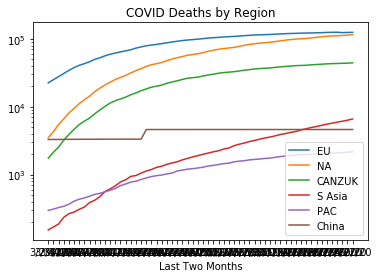

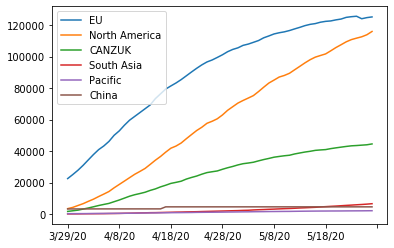

In [7]:
# plot the number of Deaths

plt.semilogy(region_deaths.tail(60))
plt.legend(["EU","NA","CANZUK","S Asia","PAC","China"])
plt.title("COVID Deaths by Region")
plt.xlabel('Last Two Months')
plt.show()

region_deaths.tail(60).plot()

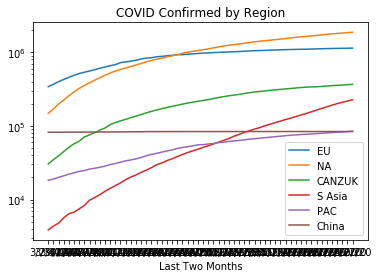

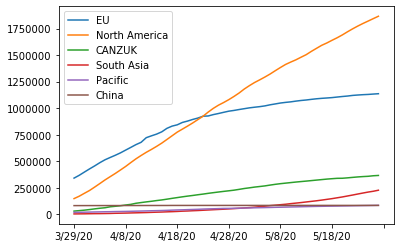

In [8]:
# plot the number of Confirmed

plt.semilogy(region_confirmed.tail(60))
plt.legend(["EU","NA","CANZUK","S Asia","PAC","China"])
plt.title("COVID Confirmed by Region")
plt.xlabel('Last Two Months')
plt.show()

region_confirmed.tail(60).plot()

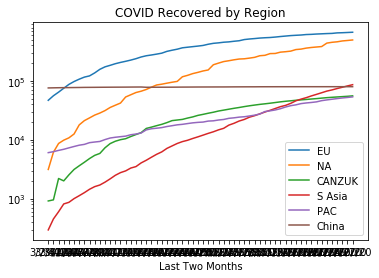

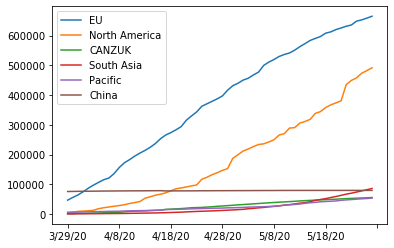

In [9]:
# plot the number of Recovered

plt.semilogy(region_recovered.tail(60))
plt.legend(["EU","NA","CANZUK","S Asia","PAC","China"])
plt.title("COVID Recovered by Region")
plt.xlabel('Last Two Months')
plt.show()

region_recovered.tail(60).plot()